In [1]:
import NetSim
import json
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

def connectivity_regions(rw):
    if rw['connectivity'] == 0:
        return "0-connectivity"
    elif rw['first_comp'] < 1:
        return "0<giant-comp<1"
    else:
        return "giant-comp=1"

TODO: Node ---> Vertex, link/connection ---> Edge
<h1>Introduction</h1>
<h2>Random Graphs</h2>
<h2>Spatial Networks</h2>
Many real-world complex systems have spatial components constraining the network structures these types of systems can produce. Infrastructure networks such as transportation, electrical, and telecommunication systems, social networks and even our own synaptic networks are all embedded in physical space. Spatial Networks provide a framework for network models having spacial elements where nodes are embedded in space and a metric is encorporated that influences the probability of connection between nodes. Typically, the probability of connection is a decreasing function of the metric, with most models assuming euclidean distance in 2-dimensions or 3-dimensions. The intuition of most Spatial Network models propose that there exists an increasing cost of connection between nodes that are further apart, which is an obvious element for most spacially embedded systems such as infrastructure or biological networks. **Link to applied studies**

The potential application of Spatial Networks to such a wide variety of real-world systems has motivated substainial research into these networks, with many unique but closely related models being proposed with theoretical proofs for many of their network properties. The 2010 Spatial Networks review article by Marc Barthélemy[1] provides a comprehensive overview of the field and reviews many of the most important theoretical proofs for the most common Spatial Network models. In this paper, we investigate the relationships between the most common Spatial Network models by considering the shared parameters utilized by these models. Specifically, we show that the most common Spatial Network models are obtained by combinations of only 3 parameters:

R - The maximum connection distance  
P(d<sub>ij</sub>) - The probability of edge connection as a function of the distance, d<sub>ij</sub>, between nodes i,j where i ≠ j  
Θ - The node weight threshold for connection

For all Spatial Network models considered in this work, nodes are uniformly distributed onto the unit square with weights sampled from an exponential distribution controlled by an additional parameter, λ. Distance, d<sub>ij</sub> is assumed to be the Euclidean distance unless otherwise stated, but in general can be any measure of distance between entities, including non-spatial measures.

We also propose two new Spatial Network models derived from the combination of these 3 parameters that, to the best of our knowledge, have not yet been widely researched in published literature.

Figure 1 shows the relationships between Spatial Network Models connected by their shared parameterization. The models in green boxes are the two new models proposed in this paper, namely Thresholded Random Geometric Graphs and Thresholded Soft Random Geometric Graphs.

<img src="Spatial Network Parameterization Graphic.PNG"style="width: 600px;"/>

<h3>Individual Model Definitions</h3>
This section summarizes the various models considered in this work. The notation E<sub>ij</sub> indicates an edges exists between nodes i and j.

<h4>Random Geometric Graphs (R)</h4>
A d-dimensional Random Geometric Graph (RGG) is a graph where each of the N nodes is assigned random coordinates in the box [0, 1]<sup>d</sup>, and only nodes ‘close’ to each other are connected by an edge[2]. Any node within or equal to the maximum connection distance, R, is a connected node and the structure of the network is fully defined by R. RGGs, similar to Unit Disk Graphs [3],  have been widely used to model ad-hoc wireless networks[12]. **animation of connections**  

(1) E<sub>ij</sub>: d<sub>ij</sub> ≤ R

<h4>Waxman Graphs (α)</h4>
Waxman Graphs are the spatial generalization of ER random graphs, where the probability of connection of nodes depends on a function of the distance between them[4]. The original edge probabiliy function proposed by Waxman is exponential in d<sub>ij</sub>, providing two connection probability tuning parameters, α and β:  

(2)  P(d<sub>ij</sub>) = βe<sup>-d<sub>ij</sub>/Lα</sup>         
Where L is the maximum distance between each pair of nodes

The shape of the edge probabiliy function, P(d<sub>ij</sub>), plays the key role in determining the structure of a Waxman graph, but characterization of P(d<sub>ij</sub>) in real-world networks still seems controversial [8]. The most commonly studied functional families are the orginal exponential in Equation 1, or power laws, -d<sub>ij</sub><sup>-α</sup> [13].
**graphic coloring conections based on link probability**

(3) E<sub>ij</sub> ∝ P(d<sub>ij</sub>)

<h4>Threshold Graphs (Θ)</h4>
A simple graph G is a threshold graph if we can assign weights to the vertices such that a pair of distinct vertices is adjacent exactly when the sum of their assigned weights is or exceeds a specified threshold, Θ [6]. Threshold Graphs are not themselves Spatial Networks, as they do not encorporate a specific geometry or metric, but they introduce the ability to consider node weights as part of the network model which is utilized by other Spatial Network models such as Geometric Threshold Graphs.  

(4) E<sub>ij</sub>: (w<sub>i</sub> + w<sub>j</sub>) ≥ Θ

<h4>Geometric Threshold Graphs (P(d<sub>ij</sub>),Θ)</h4>
Geometric Threshold Graphs are the geographical generalization of Threshold Graphs, where a pair of vertices with weights w<sub>i</sub>, w<sub>j</sub>, and distance d<sub>ij</sub> are connected if and only if the product between the sum of weights  w<sub>i</sub> and w<sub>j</sub> with the edge connection function, P(d<sub>ij</sub>), is greater than or equal to a threshold value, Θ. [8]

(5) E<sub>ij</sub>: (w<sub>i</sub> + w<sub>j</sub>)P(d<sub>ij</sub>) ≥ Θ

<h4>Soft Random Geometric Graphs (R,P(d<sub>ij</sub>))</h4>
A recent extention of Random Geometric Graphs couples the influence of distance between nodes that are within the maximum connection distance, R, to better model real-world systems where node proximity does not necessarily gaurantee a connection between 'close' nodes. In Soft Random Geometric Graphs, the probability  of connection between nodes i and j is a function of their distance, d<sub>ij</sub>, if d<sub>ij</sub> ≤ R. Otherwise, they are disconnected [7].

(6) E<sub>ij</sub> ∝ P(d<sub>ij</sub>) if d<sub>ij</sub> ≤ R

<h4>Thresholded Random Geometric Graphs (R,Θ)</h4>
Thresholded Random Geometric Graphs extend RGGs to incorporate node weights into the model, where connections are only made between nodes with sufficiently powerful weights, up to a maximum connection distance between nodes.   

(7) (w<sub>i</sub> + w<sub>j</sub>) ≥ Θ if d<sub>ij</sub> ≤ R

<h4>Thresholded Soft Random Geometric Graphs (R,P(d<sub>ij</sub>),Θ)</h4>
Thresholded Soft Random Geometric Graphs incorporate all three parameters where connections are only made if the node distance, d<sub>ij</sub> is less than or equal to the maximum connection distance, R and the product between the sum of weights  w<sub>i</sub> and w<sub>j</sub> with the edge connection function, P(d<sub>ij</sub>), is greater than or equal to a threshold value, Θ.

(8) (w<sub>i</sub> + w<sub>j</sub>)P(d<sub>ij</sub>) ≥ Θ if d<sub>ij</sub> ≤ R

<h3>A Motivating Example</h3>
The motivation for this study of Spatial Networks is grounded in the real-world application of these models to the Tesla Supercharger electric vehicle charging infrastructure network. Grounding this study to a real-world application provides direction for selecting the important network structure characteristics to study, and affords both the author and reader a tangable use case to provide an intuition and a focus for the discussion of these models.

Tesla is an Electric Vehicle (EV), storage and panel manufacturer that recently surpassed GM to become the [most valuable](https://www.theguardian.com/technology/2017/apr/10/tesla-most-valuable-car-company-gm-stock-price) vehicle manufacturer in the United States.  One of Tesla's key differentiators is its Supercharger network of fast electric vehicle charging stations, allowing users to travel large distances with electric vehicles using this infrastructure network.

<img src="NA-Supercharger Network.PNG"style="width: 600px;"/>

The Supercharger network was selected as our motivating example for 3 key reasons:
1. Admissibile - The infrastructure system and spatial nature of the Tesla Supercharger network lends itself directly to its study using Spatial Networks.
2. Valuable - The large amount of current and future investment into these types of systems makes it a pragmatic and valuable system to study.
3. Practical - The availibility of data and the existance of multiple Supercharger networks across different continents to compare and discover fundamental patterns from makes it a feasible system to study.

The Supercharger Network is modeled with the nodes being the cities of the network region, embedded onto the unit square by normalizing the GPS coordinates of each city and weighted by the population of the city as a percent of the regions total population. Connections between nodes are made for cities that have Superchargers and that are within the maximum base range of a [Tesla model 3](https://www.teslamotors.com/model3) (215miles - 346km) as determined by the
driving distance computed by google directions API between Supercharger GPS locations.  **model graphic**

<h2>Network Characteristics</h2>
In the study of random networks, many structural characteristics have been defined to generalize and compare network structures across diverse real-world networks. Typical characteristics of prominent interest include a networks degree distribution, clustering, and community structure. Informed by the Tesla Supercharger Network motivating example of this work, we study three common network structures that provide measures resembling the objectives of a designer building an infrastructure network such as the Tesla Supercharger Network, and compare these network characteristics across the Spatial Network models described in Section 2.
<h3>Network Efficacy - Giant Component</h3>
**Graphic explaining definitions **  
One of the earliest and most commonly studied network characteristics is that of the phase transition in the Giant Connected Component of a network [14]. An individual component of a complex network is the set of vertices that can be reached by all vertices of the set by paths running along edges of the graph [15]. The Giant Component of a network is the single largest component having the highest number of connected nodes, with many network models producing sharp structural transitions where the proportion of nodes existing in the Giant Component rapidly transitions from 0 to 1 at some critical threshold of network connectivity. This critical threshold is termed the percolation threshold, a well studied measure in percolation theory. The emergence of the Giant Component is directly related to a networks ability to connect widely distributed nodes and can be used as a measure of the effectiveness of a network, such as the Supercharger Network's ability to widely connect cities.
<h3>Network Efficiency - Diameter</h3>
The diameter of a network is the length (in number of edges) of the longest geodesic path between any two vertices. A geodesic path is the shortest path through the network from one vertex to another [15]. The diameter of a network provides an upper-bound on the number of 'hops' or nodes required to travel from any node to any other and can be used as a measure for the efficiency of a network [17]. 
<h3>Network Robustness - Edurance</h3>
The resilincy of a network to the random or directed removal of nodes measures the robustness of a network, and is a critical measure for understanding how different network structures respond to node failures. Most, if not all real-world networks have a non-zero probability of node failure and the notion of network resilience has been of particular importance in epidemiology, where “removal” of nodes in a contact network might correspond, for example, to vaccination of individuals against a disease, but has also be used to analyze threats or weaknesses in infrastructure and information networks [15]. In the context of our motivating example, resilence of the network can be used to explain the creation of redundant nodes to protect against the impact of single or multiple Supercharger failures in distrupting a commuters ability to travel using the network. Many metrics measuring the robustness of a network have been proposed, and in this work we utilize the 'Edurance' metric introduced in M. Manzano et al [18] where robustness is measured as the Area Under the Curve of the percent of total node weight in the Giant Component versus percent of nodes removed from the network, where each node is selected for removal with equal likelyhood. This metric models random failures in the network as opposed to targetted attacks and provides a measure of a networks ability to keep a large and highly weighted component connected with random node failure.

<h1>Spatial Network Models Characteristic Analysis</h1>
Using the network characterstics defined in Section 3, we explore the analytical and numerical results for these characteristics among the network models introduced in Section 2, with the goal of comparing the results and patterns between these diverse models, and ultimately identifying those model which may be best suited for describing the Tesla Supercharger Network and other infrastructure projects having similar network structures. 
<h4>Random Geometric Graphs</h4>

In [2]:
sim_data = NetSim.run_sim(N_list=[1000],lamd_limits=[1,1],
                          R_limits=[0,0.15],alpha_limits=[0,0],theta_limits =[0,0],beta_limits = [0,0],
                          iterations=6,n_jobs=6)

In [22]:
full_sim_data = add_sim_data('../Simulation Data/RGG.json',sim_data)
df = pd.DataFrame(full_sim_data,columns=['N','lamd','R','alpha','theta','beta','K','mu','connectivity','first_comp',
                                    'all_comps','diameter','endurance','removal_percent'])
df['N-connectivity'] = df['N']/df['connectivity']

NameError: name 'add_sim_data' is not defined

In [4]:
df.head()

,N,lamd,R,alpha,theta,beta,K,mu,connectivity,first_comp,second_comp,diameter,endurance,removal_percent,N-connectivity
0,1000,1.0,0.020197,0.0,0.0,0.0,660,1.000616,1.320,0.018,"[0.001, 0.006, 0.003, 0.001, 0.001, 0.006, 0.0...",12,0.987286,0.05,757.575758
1,1000,1.0,0.038675,0.0,0.0,0.0,2319,1.008388,4.638,0.659,"[0.659, 0.178, 0.016, 0.012, 0.016, 0.021, 0.0...",49,0.320653,0.05,215.610177
2,1000,1.0,0.079501,0.0,0.0,0.0,9173,1.039965,18.346,1.000,[1.0],21,0.000000,0.05,54.507795
3,1000,1.0,0.026852,0.0,0.0,0.0,1131,1.005835,2.262,0.025,"[0.004, 0.009, 0.002, 0.007, 0.004, 0.008, 0.0...",14,0.981138,0.05,442.086649
4,1000,1.0,0.110415,0.0,0.0,0.0,17403,1.044797,34.806,1.000,[1.0],14,0.000000,0.05,28.730679


<b>Emergence of the Giant Component</b>  
In the Random Geometric Graphs paper by Dall and Christensen [2], a numerical analysis for the connectivity percolation threshold of RGGs in various dimensions was determined by finite size scaling. For 2-dimensional RGGs, the critical connectivity threshold was found to be 4.52 ± 0.01.

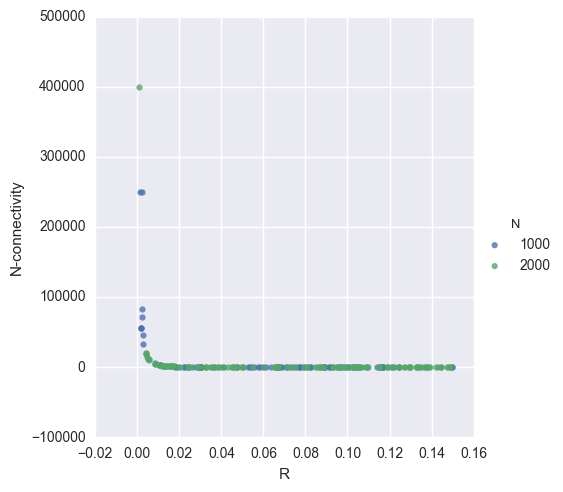

In [3]:
CB = sns.lmplot("R", "N-connectivity", data=df, hue='N', fit_reg=False)

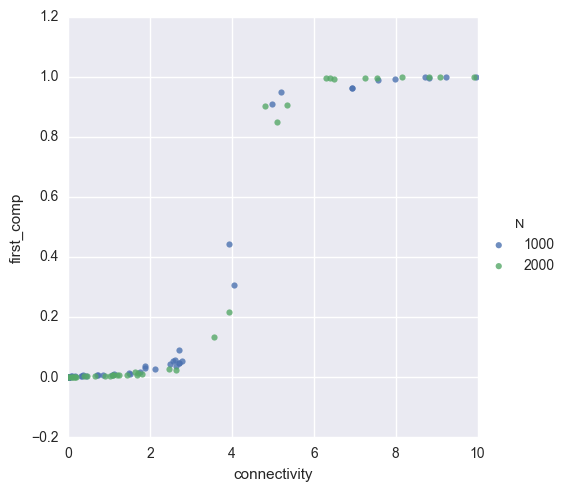

In [4]:
FC = sns.lmplot("connectivity", "first_comp", data=df, hue='N', fit_reg=False)
FC.set(xlim=(0, 10))

<b>Diameter</b>

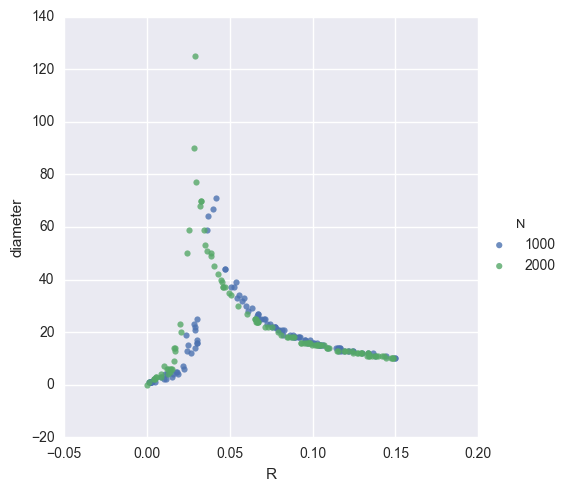

In [5]:
RD = sns.lmplot("R", "diameter", data=df, hue='N', fit_reg=False)

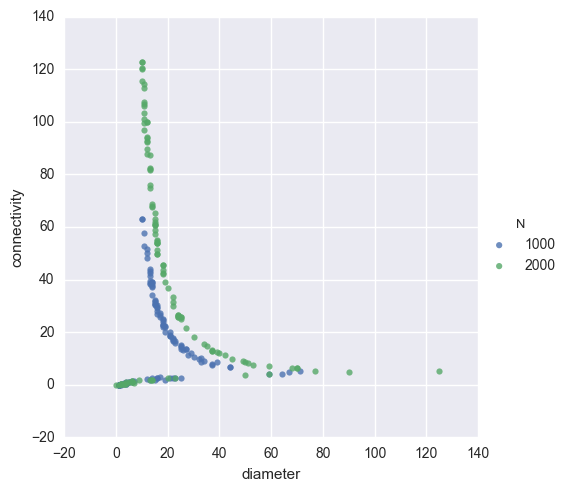

In [6]:
RC = sns.lmplot("diameter", "connectivity", data=df, hue='N', fit_reg=False)

<b>Network Robustness - Edurance</b>

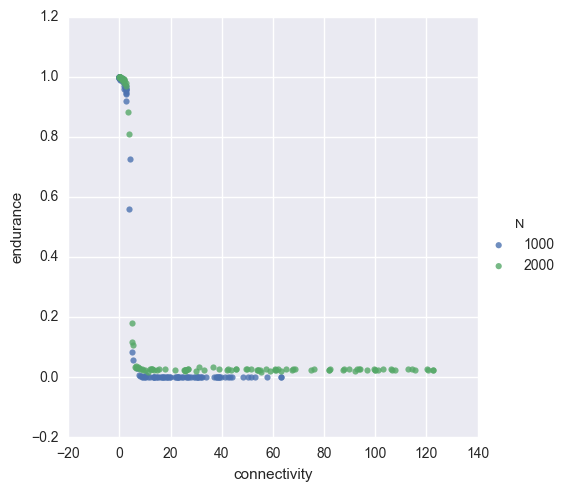

In [7]:
EC = sns.lmplot("connectivity", "endurance", data=df, hue='N', fit_reg=False)

<h4>Waxman Graphs</h4>
<h4>Threshold Graphs</h4>
<h4>Soft Random Geometric Graphs</h4>
<h4>Geometric Threshold Graphs</h4>
<h5>Boolean Model</h5>
<h5>Gravity Model</h5>
<h4>Thresholded Random Geometric Graphs</h4>


In [40]:
with open('../Simulation_Data/TRGG_power.json', 'r') as infile:
    loaded_sim_data = json.load(infile)
df = pd.DataFrame(loaded_sim_data,columns=['N','lamd','R','alpha','theta','beta','K','mu','connectivity','first_comp',
                                    'all_comps'])
df['N-connectivity'] = df['N']/df['connectivity']
df['theta-mu'] = df['theta']/df['mu']
df['theta-lamd'] = df['theta']/df['lamd']
df['con-regions'] = df.apply (lambda rw: connectivity_regions (rw),axis=1)
df=df[df['theta-mu']<=20]
df=df[df['lamd'] != 0]

<b>Connectivity Percolation</b>

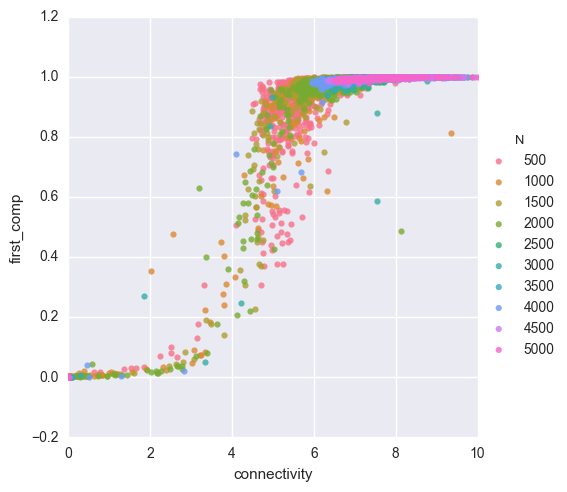

In [13]:
FC = sns.lmplot("connectivity", "first_comp", data=df[df['N']>=500], hue='N', fit_reg=False)
FC.set(xlim=(0, 10))

<b>Percolation Parameter Space</b>

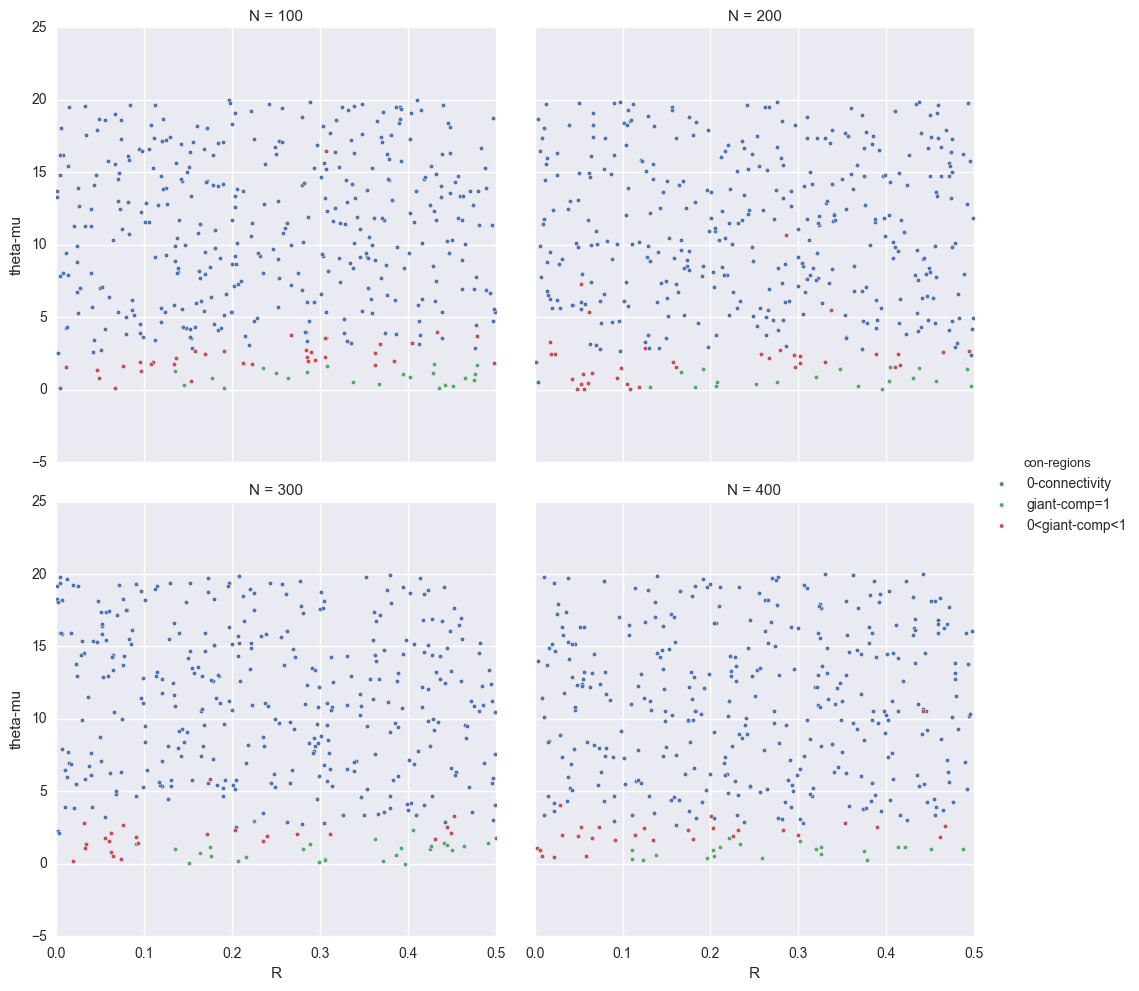

In [52]:
g = sns.FacetGrid(df[df['N']<=400], col="N",  hue="con-regions",col_wrap=2,size=5)
g = (g.map(plt.scatter, "R", "theta-mu", edgecolor="w",s=10).add_legend())
g.set(xlim=(0,0.5))

<b>Critical R</b>

In [63]:
with open("..\Simulation_Data\R_bounds.json", 'r') as infile:
    R_limits_dict = json.load(infile)
R_limits_dict

{'100': 0.12967443492081807,
 '1000': 0.047124953990569506,
 '1500': 0.03850156977293308,
 '200': 0.09946815660506061,
 '2000': 0.033993408254886844,
 '2500': 0.03159069515395208,
 '300': 0.0795152116003319,
 '3000': 0.02894364385075306,
 '3500': 0.02703036845089272,
 '4000': 0.025183078382711718,
 '4500': 0.023720709518802757,
 '500': 0.06289840039544227,
 '5000': 0.022919088104674953,
 '5500': 0.02220715122479493,
 '6000': 0.02127299694299545}

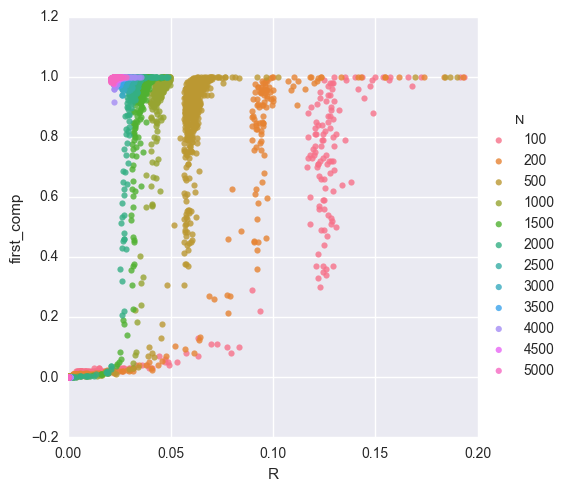

In [15]:
FR = sns.lmplot("R", "first_comp", data=df[df['theta']==0], hue='N', fit_reg=False)
FR.set(xlim=(0, 0.2))

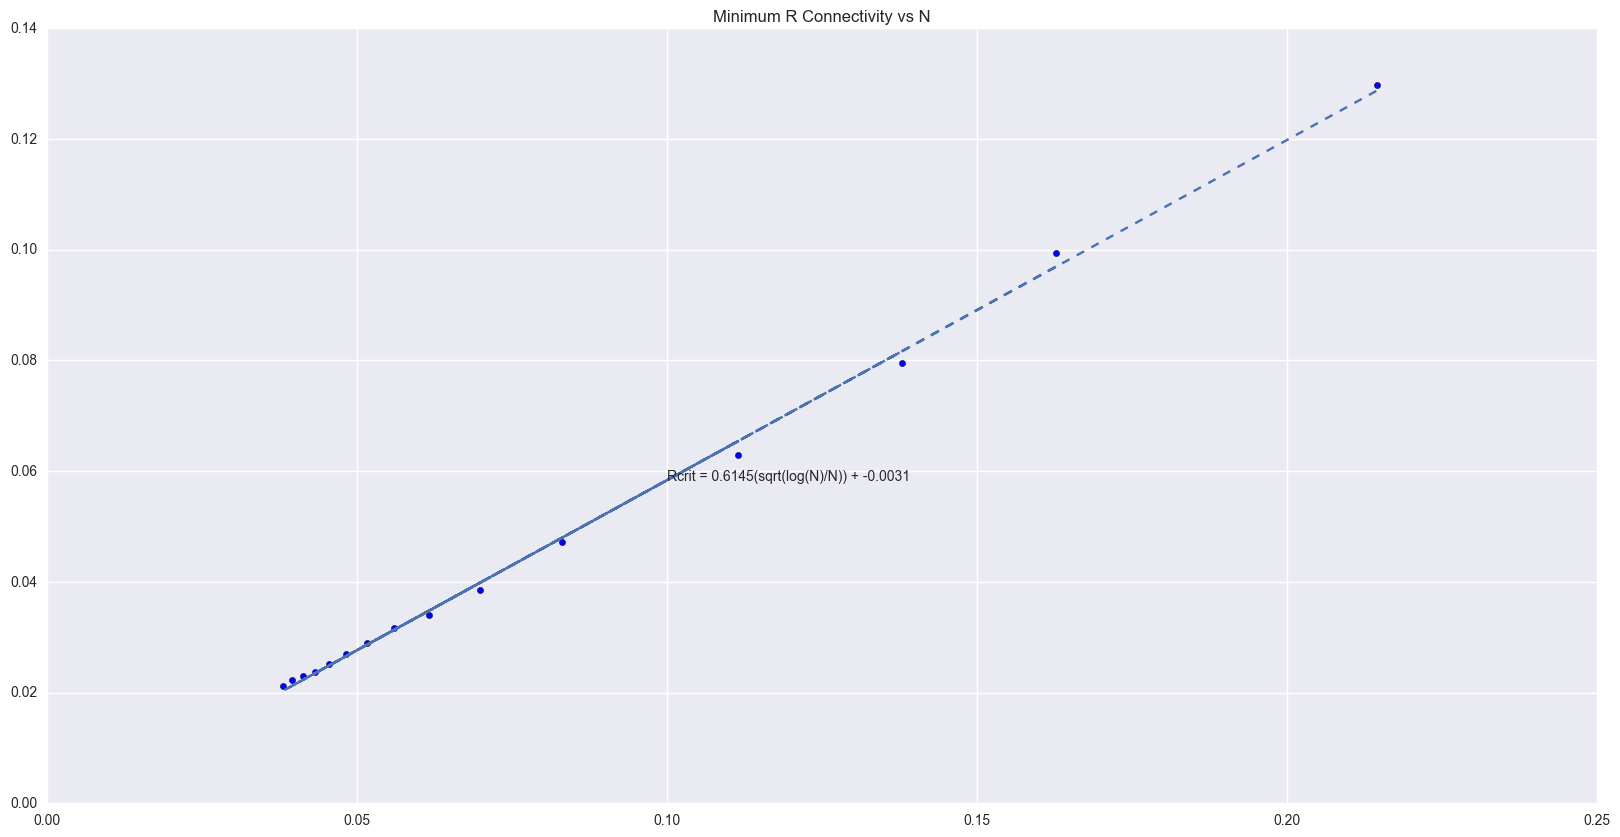

In [77]:
N_list = [N for N in R_limits_dict.keys() if int(N) >=1]
critical_R_giant = [R_limits_dict[N] for N in N_list]
log_N = [(math.log(int(N))/int(N))**0.5 for N in N_list]
GC_fit = np.polyfit(log_N, critical_R_giant, 1)
GC_fit_line = [GC_fit[0]*lgN +  GC_fit[1] for lgN in log_N]
plt.figure(figsize=(20,10))
plt.scatter(log_N,critical_R_giant)
plt.plot(log_N,GC_fit_line,'--')
line_eqn = "Rcrit = %s(sqrt(log(N)/N)) + %s" % (round(GC_fit[0],4), round(GC_fit[1],4))
x0 = 0.1
y0 = GC_fit[0]*x0+GC_fit[1]
plt.annotate(line_eqn, xy=(x0, y0), xytext=(x0, y0))
plt.title('Minimum R Connectivity vs N')

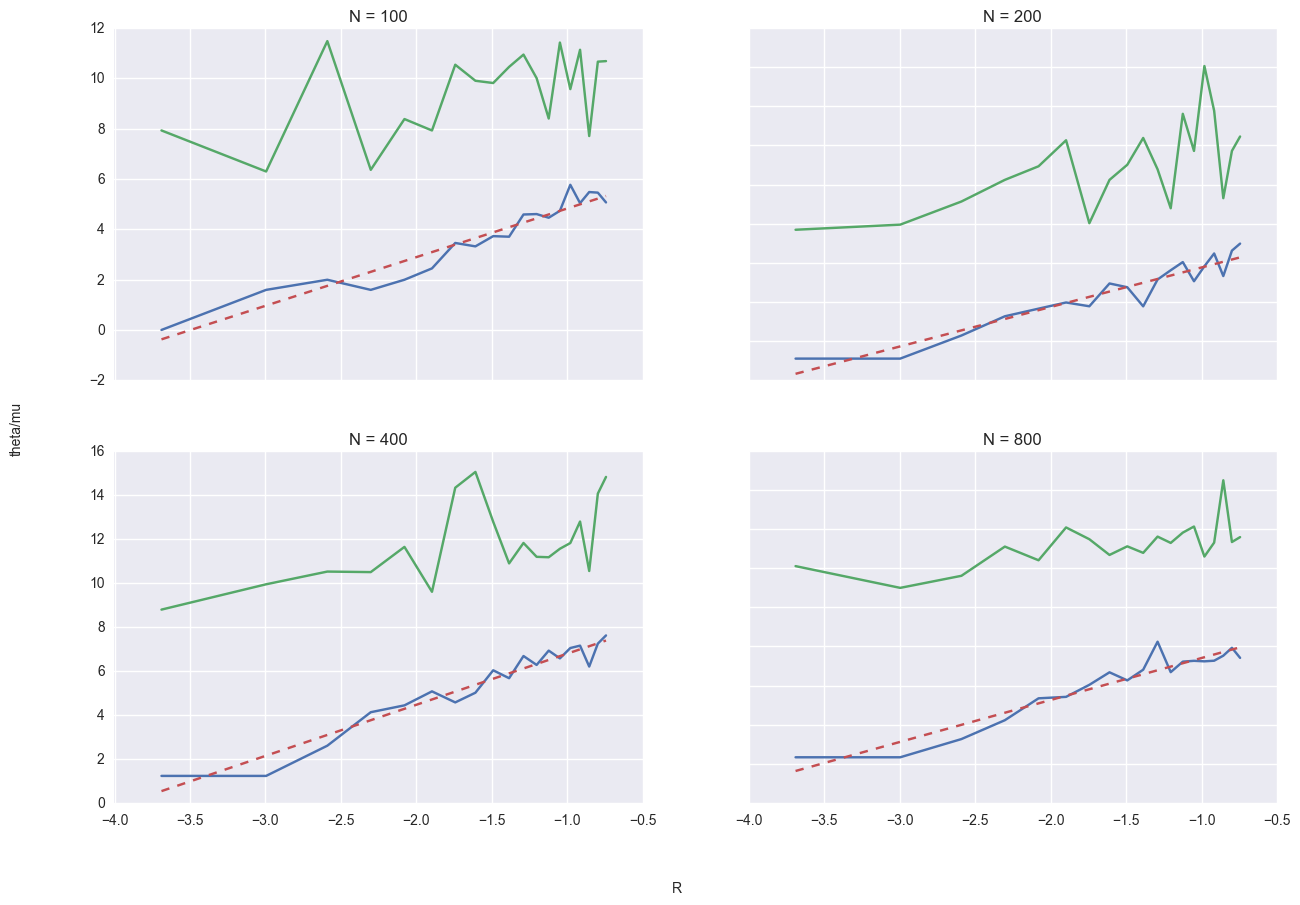

In [476]:
f, axarr = plt.subplots(2, 2,figsize=(15, 10))
axarr[0, 0].plot(log_R[:-1],data_dict[100][0])
axarr[0, 0].plot(log_R[:-1],data_dict[100][1])
axarr[0, 0].plot(log_R[1:-1],data_dict[100][2],'--')
axarr[0, 0].set_title('N = 100')
axarr[0, 1].plot(log_R[:-1],data_dict[200][0])
axarr[0, 1].plot(log_R[:-1],data_dict[200][1])
axarr[0, 1].plot(log_R[1:-1],data_dict[200][2],'--')
axarr[0, 1].set_title('N = 200')
axarr[1, 0].plot(log_R[:-1],data_dict[400][0])
axarr[1, 0].plot(log_R[:-1],data_dict[400][1])
axarr[1, 0].plot(log_R[1:-1],data_dict[400][2],'--')
axarr[1, 0].set_title('N = 400')
axarr[1, 1].plot(log_R[:-1],data_dict[800][0])
axarr[1, 1].plot(log_R[:-1],data_dict[800][1])
axarr[1, 1].plot(log_R[1:-1],data_dict[800][2],'--')
axarr[1, 1].set_title('N = 800')
#axarr[2, 0].plot(log_R[:-1],data_dict[1000][0])
#axarr[2, 0].plot(log_R[:-1],data_dict[1000][1])
#axarr[2, 0].set_title('N = 1000')
#axarr[2, 1].plot(log_R[:-1],data_dict[2000][0])
#axarr[2, 1].plot(log_R[:-1],data_dict[2000][1])
#axarr[2, 1].set_title('N = 2000')

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.text(0.5, 0.04, 'R', ha='center', va='center')
f.text(0.06, 0.5, 'theta/mu', ha='center', va='center', rotation='vertical')
plt.show()

In [1]:
import simulator
simulator.upper_bound_theta({100:[10, 5]},10,0.1)

{100: [10.70510144790588, 5]}

In [6]:
critical_theta_df = df[df['R'] == 1]

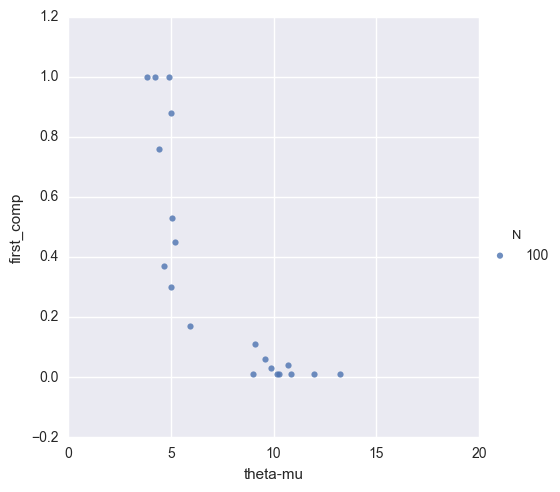

In [7]:
FR = sns.lmplot("theta-mu", "first_comp", data=critical_theta_df, hue='N', fit_reg=False)
FR.set(xlim=(0, 20))

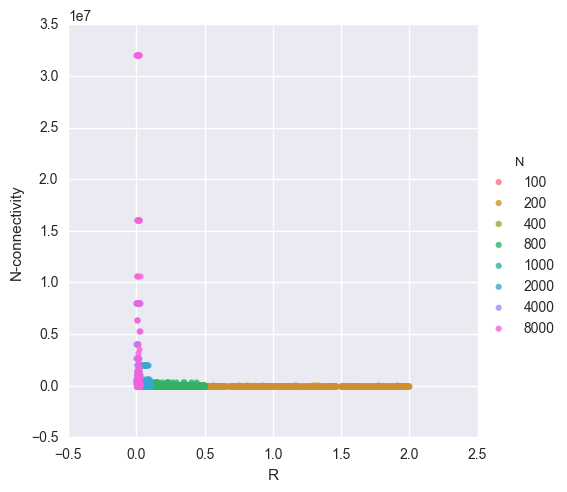

In [7]:
CR = sns.lmplot("R", "N-connectivity", data=df, hue='N', fit_reg=False)

In [ ]:
CT = sns.lmplot("theta", "N-connectivity", data=df, hue='N', fit_reg=False)
CT.set(ylim=(0, 10))

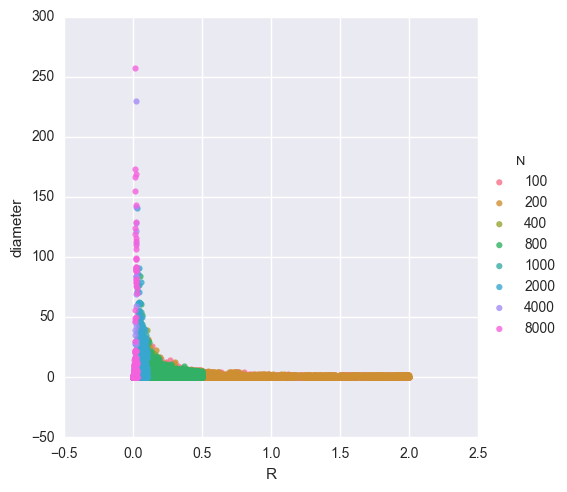

In [8]:
RD = sns.lmplot("R", "diameter", data=df, hue='N', fit_reg=False)

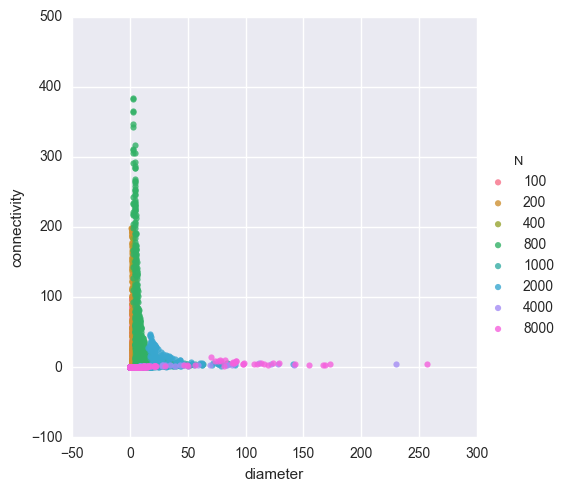

In [9]:
RC = sns.lmplot("diameter", "connectivity", data=df, hue='N', fit_reg=False)

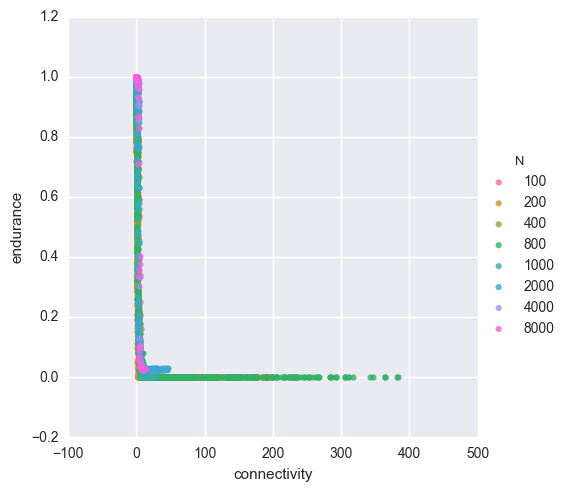

In [10]:
EC = sns.lmplot("connectivity", "endurance", data=df, hue='N', fit_reg=False)

<h4>Dynamic Thresholded Random Geometric Graphs</h4>

In [ ]:
!ipython NetSim.py [1000,2000,4000,8000] [0,2] [0,0.1] [0,0] [0,50] [0,10] 200 6 5 "C:/Users/macle/Desktop/UPC Masters/Semester 3/Thesis/Simulation_Data/DTRGG.json"

<h2>Summary</h2>
<h1>Tesla Supercharger Network Case Study</h1>
<h1>Conclusions</h1>
<h1>Future Work</h1>
Dynamic models (changing functions as function of current network size - equilibrium analysis)
<h1>References</h1>
[1] - Spatial Networks https://arxiv.org/pdf/1010.0302.pdf  
[2] - Random Geometric Graphs https://arxiv.org/pdf/cond-mat/0203026.pdf  
[3] - Unit Disk Graphs http://www.sciencedirect.com/science/article/pii/0012365X9090358O  
[4] - Waxman Graphs - http://ieeexplore.ieee.org/document/12889/  
[5] - Waxman Graph Parameter Estimation - https://arxiv.org/pdf/1506.07974.pdf  
[6] - Threshold Graphs - http://www.combinatorics.org/ojs/index.php/eljc/article/view/v16i1r130/pdf  
[7] - Soft Geometric Random Graphs - https://arxiv.org/pdf/1311.3897.pdf  
[8] - Geometric Threshold Graphs - https://arxiv.org/pdf/cond-mat/0409378.pdf  
[9] - Structure of Geometric Threshold Graphs - https://projecteuclid.org/download/pdf_1/euclid.im/1259158600  
[10] - Continuum Percolation - http://www.cambridge.org/catalogue/catalogue.asp?isbn=9780521062503  
[11] - Gravity nd Spatial Interaction Models - http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.330.7496&rep=rep1&type=pdf   
[12] https://arxiv.org/pdf/cond-mat/0211325.pdf  
[13] http://www.biological-networks.org/pubs/Kaiser2004b.pdf  
[14] Phase Transitions in Complex Networks - http://guava.physics.uiuc.edu/~nigel/courses/563/Essays_2012/PDF/Tuegel.pdf  
[15] The Function and Structure of Complex Networks - https://arxiv.org/pdf/cond-mat/0303516.pdf  
[16] Critical Phenomenan in Complex Networks - https://arxiv.org/pdf/0705.0010.pdf  
[17] Diameter of Erdos–Renyi graphs - http://www.iis.ee.ic.ac.uk/m.draief/file/Home_files/Diameter%20of%20Erdos-Renyi%20graphs.pdf  
[18] Network Robustness Metrics - http://www.sciencedirect.com/science/article/pii/S1389128613002740   
[19] Analysis of scale-free networks based on a threshold graph with intrinsic vertex weights - https://journals-aps-org.recursos.biblioteca.upc.edu/pre/pdf/10.1103/PhysRevE.70.036124  
[20] Complex Networks Threshold Graphs  
[21] Sharp Threshold in RGGs


https://link.springer.com/article/10.1007/s10955-015-1436-1

In [17]:
G = NetSim.generate_network(N=100,lamd=1,R=0.1,alpha=0,theta=1,beta = 0.1)

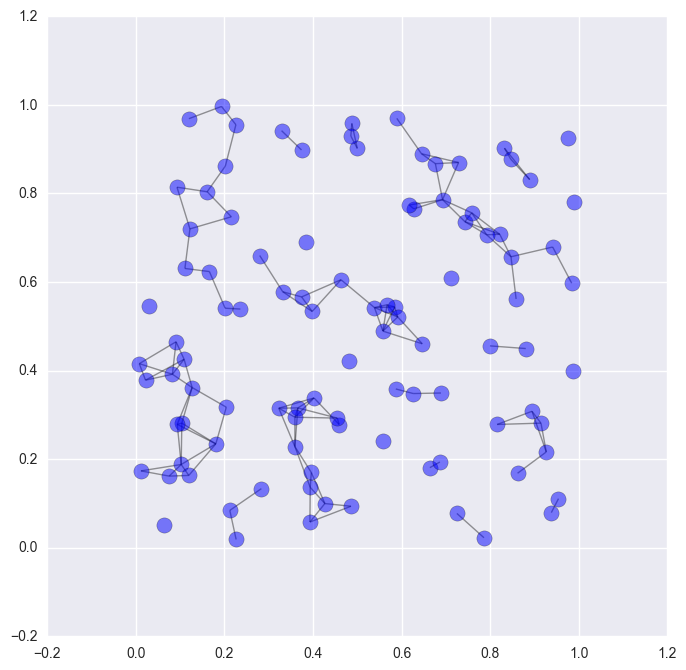

In [18]:
NetSim.visualize_network(G)

In [16]:
sim_data = NetSim.run_sim(N_list=[1000,2000],lamd_limits=[1,1],
                          R_limits=[0,0.15],alpha_limits=[0,0],theta_limits =[0,25],beta_limits = [0,2],
                          iterations=500,n_jobs=6)

In [8]:
full_sim_data = add_sim_data('../Simulation Data/DTRGG.json',sim_data)

In [9]:
df = pd.DataFrame(full_sim_data,columns=['N','lamd','R','alpha','theta','beta','K','mu','connectivity','first_comp',
                                    'second_comp','diameter','resilence','removal_percent'])
df['theta-beta'] = df['theta']/df['beta']
df['N-connectivity'] = df['N']/df['connectivity']
df.head()

,N,lamd,R,alpha,theta,beta,K,mu,connectivity,first_comp,second_comp,diameter,resilence,removal_percent,theta-beta,N-connectivity
0,1000,1.0,0.029877,0.0,12.524816,1.210302,0,1.034913,0.000,0.0010,0.0010,0,0.999649,0.05,10.348504,inf
1,2000,1.0,0.137534,0.0,12.683589,1.901110,92806,1.005645,92.806,1.0000,0.0000,11,0.024198,0.05,6.671674,21.550331
2,1000,1.0,0.017515,0.0,6.505016,0.286314,292,0.975732,0.584,0.0100,0.0070,6,0.984928,0.05,22.719898,1712.328767
3,2000,1.0,0.089361,0.0,13.734928,0.307711,0,1.020712,0.000,0.0005,0.0005,0,0.999598,0.05,44.635771,inf
4,1000,1.0,0.045302,0.0,10.105591,1.025573,3089,0.970689,6.178,0.9260,0.0230,45,0.071688,0.05,9.853602,161.864681


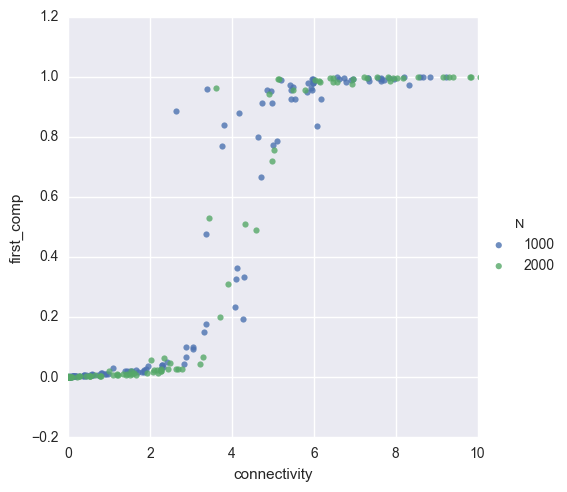

In [10]:
FC = sns.lmplot("connectivity", "first_comp", data=df, hue='N', fit_reg=False)
FC.set(xlim=(0, 10))

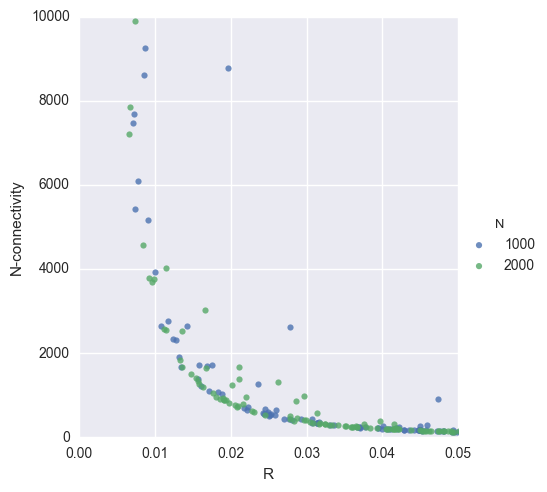

In [16]:
CB = sns.lmplot("R", "N-connectivity", data=df, hue='N', fit_reg=False)
CB.set(xlim=(0, 0.05))
CB.set(ylim=(0, 10000))

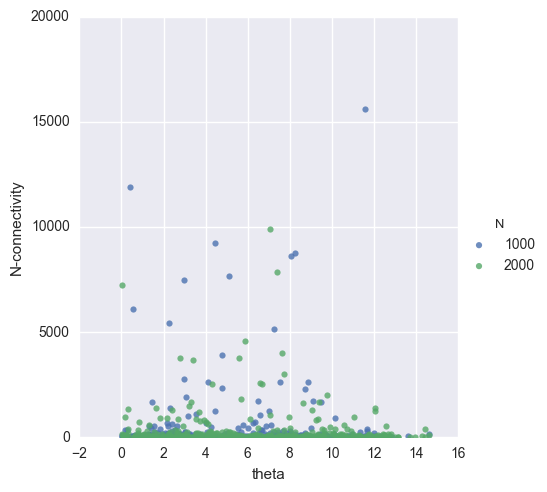

In [22]:
CT = sns.lmplot("theta", "N-connectivity", data=df, hue='N', fit_reg=False)
CT.set(ylim=(0, 20000))

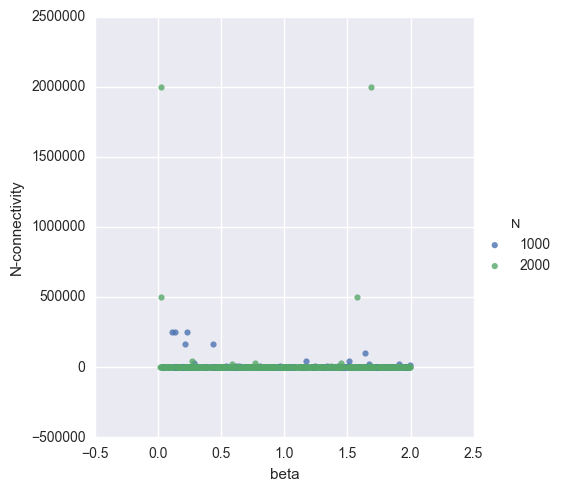

In [23]:
CB = sns.lmplot("beta", "N-connectivity", data=df, hue='N', fit_reg=False)

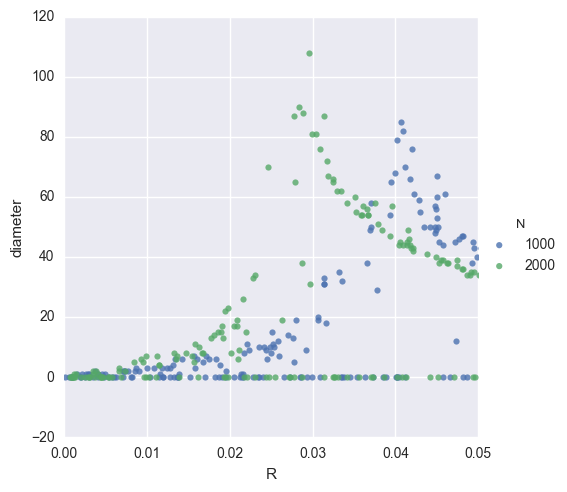

In [14]:
RD = sns.lmplot("R", "diameter", data=df, hue='N', fit_reg=False)
RD.set(xlim=(0, 0.05))